In [ ]:
import networkx as nx
from networkx.algorithms.community import *

Nodes:  34
Edges:  78


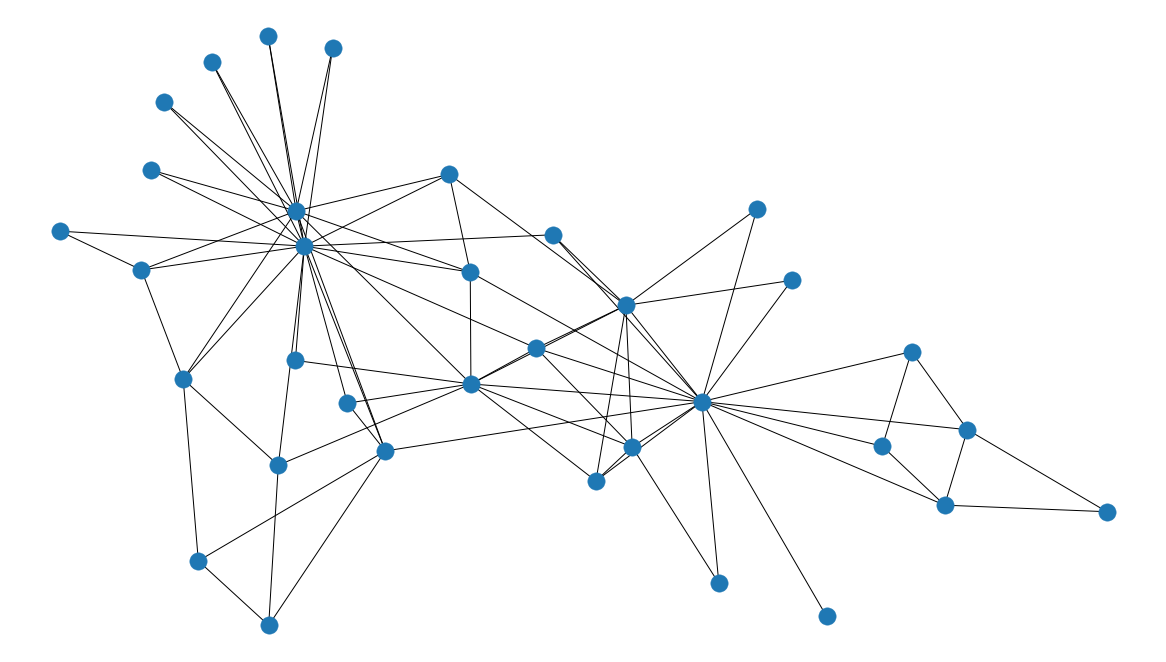

In [ ]:
g = nx.karate_club_graph()
print("Nodes: ", len(g.nodes))
print("Edges: ", len(g.edges))
nx.draw(g)

In [ ]:
def createColoursFromNetworkX(g, clusters):
  newClusters = {}
  
  for node in g:
    for clusterID in range(len(clusters)):
      if node in clusters[clusterID]:
        newClusters[node] = clusterID
        
  colours = [newClusters[node] for node in newClusters]
  
  return colours

In [ ]:
communities_generator = girvan_newman(g)

top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

clusters = sorted(map(sorted, next_level_communities))
clusters

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
 [9]]

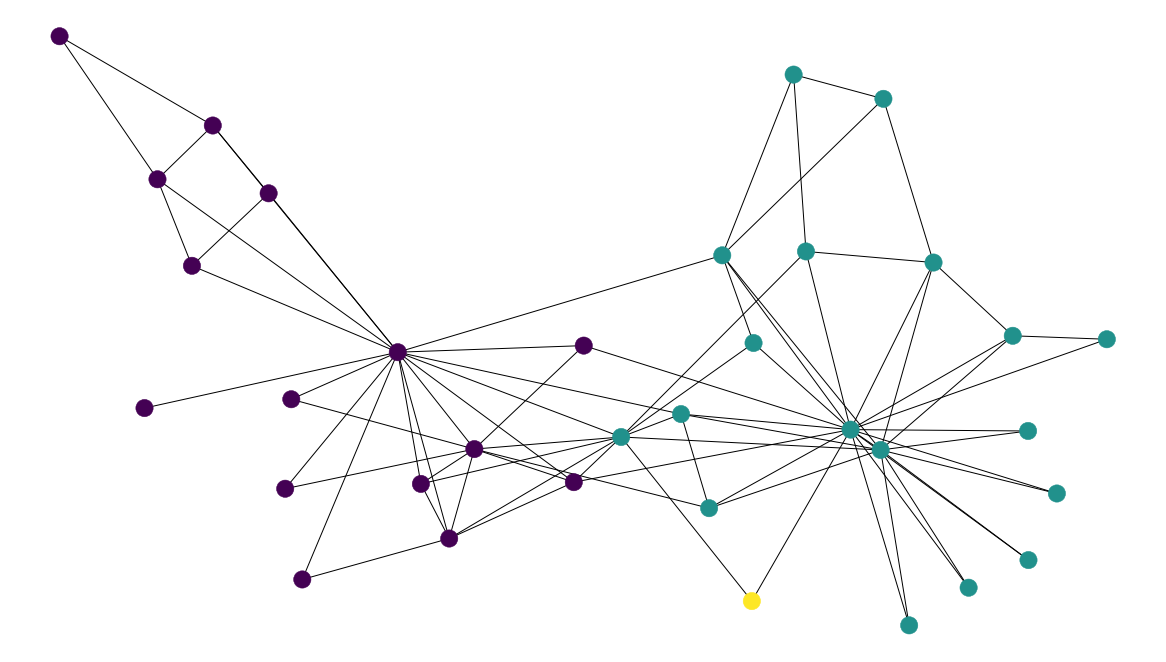

In [ ]:
colours = createColoursFromNetworkX(g, clusters)
nx.draw(g, node_color=colours)

In [ ]:
cliques = list(nx.find_cliques(g))
cliques

[[0, 1, 17],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 7],
 [0, 1, 19],
 [0, 1, 21],
 [0, 4, 10],
 [0, 4, 6],
 [0, 5, 10],
 [0, 5, 6],
 [0, 8, 2],
 [0, 11],
 [0, 12, 3],
 [0, 31],
 [1, 30],
 [2, 32, 8],
 [2, 9],
 [2, 27],
 [2, 28],
 [5, 16, 6],
 [33, 32, 8, 30],
 [33, 32, 14],
 [33, 32, 15],
 [33, 32, 18],
 [33, 32, 20],
 [33, 32, 22],
 [33, 32, 23, 29],
 [33, 32, 31],
 [33, 9],
 [33, 13],
 [33, 19],
 [33, 26, 29],
 [33, 27, 23],
 [33, 28, 31],
 [24, 25, 31],
 [24, 27],
 [25, 23]]

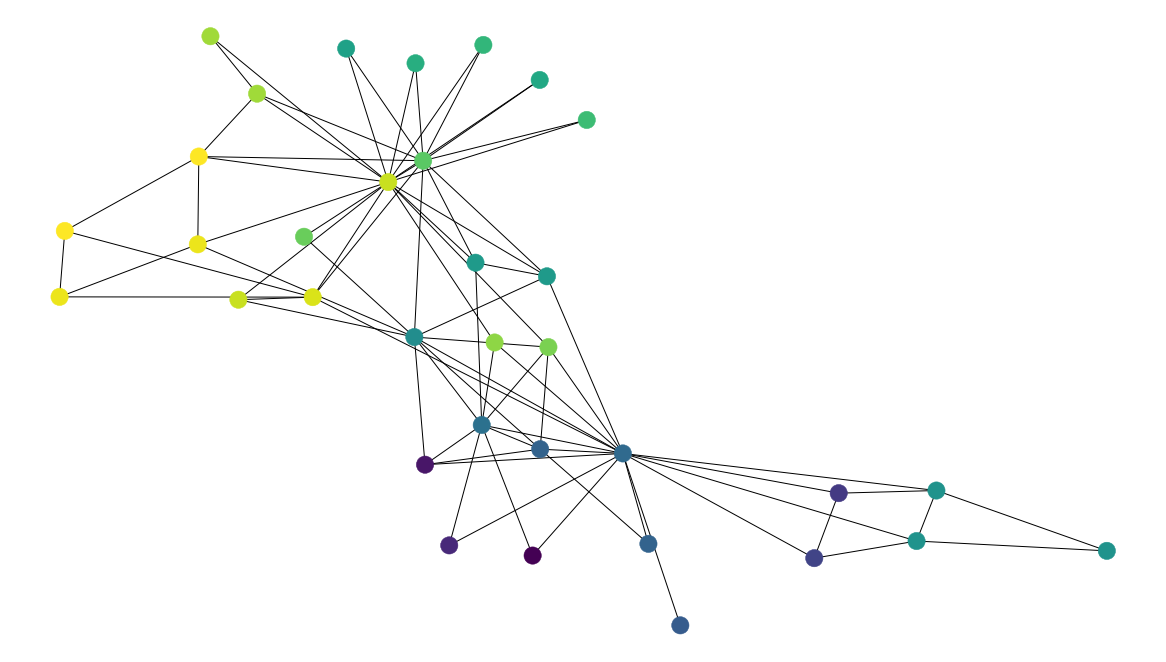

In [ ]:
colours = createColoursFromNetworkX(g, cliques)
nx.draw(g, node_color=colours)

In [ ]:
number_of_communities = 2

fluidCommunities = list(asyn_fluidc(g, number_of_communities, max_iter=100, seed=None))
fluidCommunities

[{0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21},
 {8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

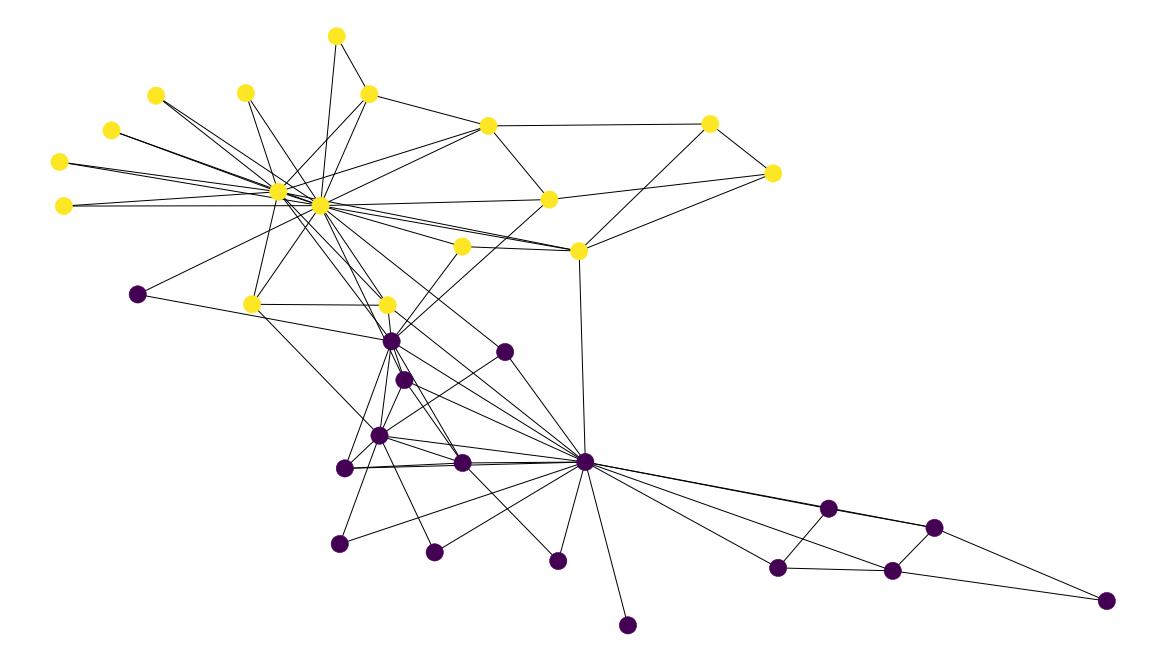

In [124]:
colours = createColoursFromNetworkX(g, fluidCommunities)
nx.draw(g, node_color=colours)

In [139]:
adj = nx.adjacency_matrix(g)
adj = adj.todense();
adj

matrix([[0, 1, 1, ..., 1, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 1],
        [0, 0, 1, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

In [146]:
from sklearn import cluster

In [147]:
def createColoursFromSklearn(g, clusters):
  colours = [clusters[node] for node in g]
  
  return colours

In [151]:
number_of_clusters = 2

kmeans = cluster.KMeans(n_clusters=number_of_clusters, n_init=200)
kmeans.fit(adj)

resultKMeans = list(kmeans.labels_)
resultKMeans

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

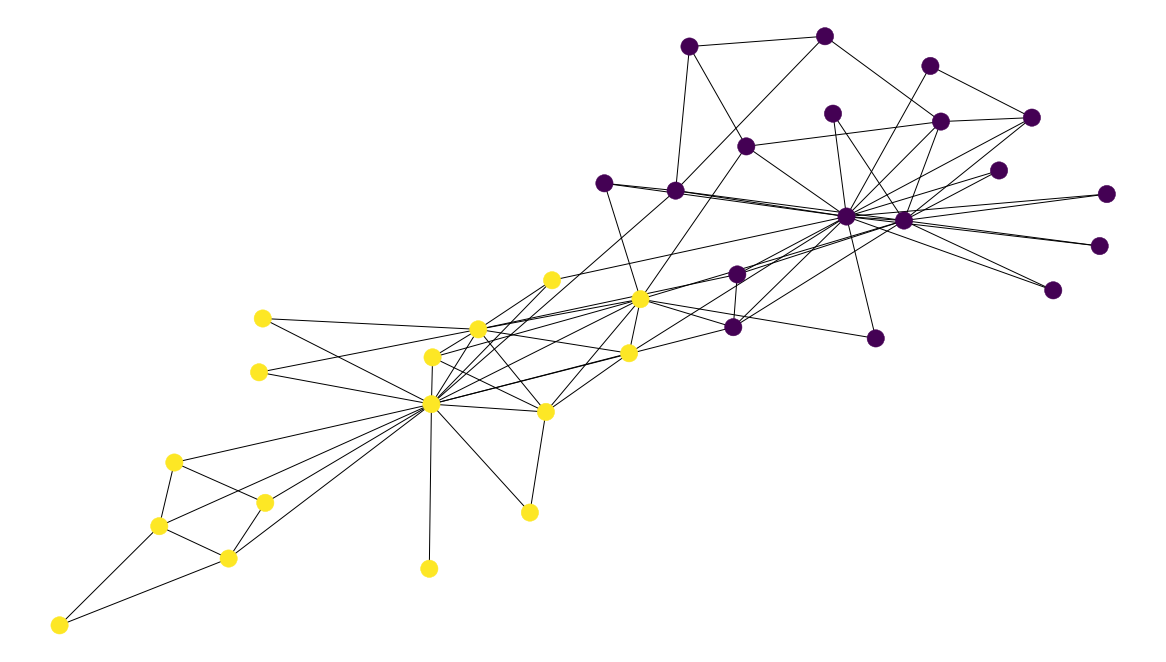

In [152]:
colours = createColoursFromSklearn(g, resultKMeans)
nx.draw(g, node_color=colours)

In [153]:
number_of_clusters = 4

agglomerative = cluster.AgglomerativeClustering(n_clusters=number_of_clusters, linkage="ward")
agglomerative.fit(adj)

resultAgglomerative = list(agglomerative.labels_)
resultAgglomerative

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


[3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2]

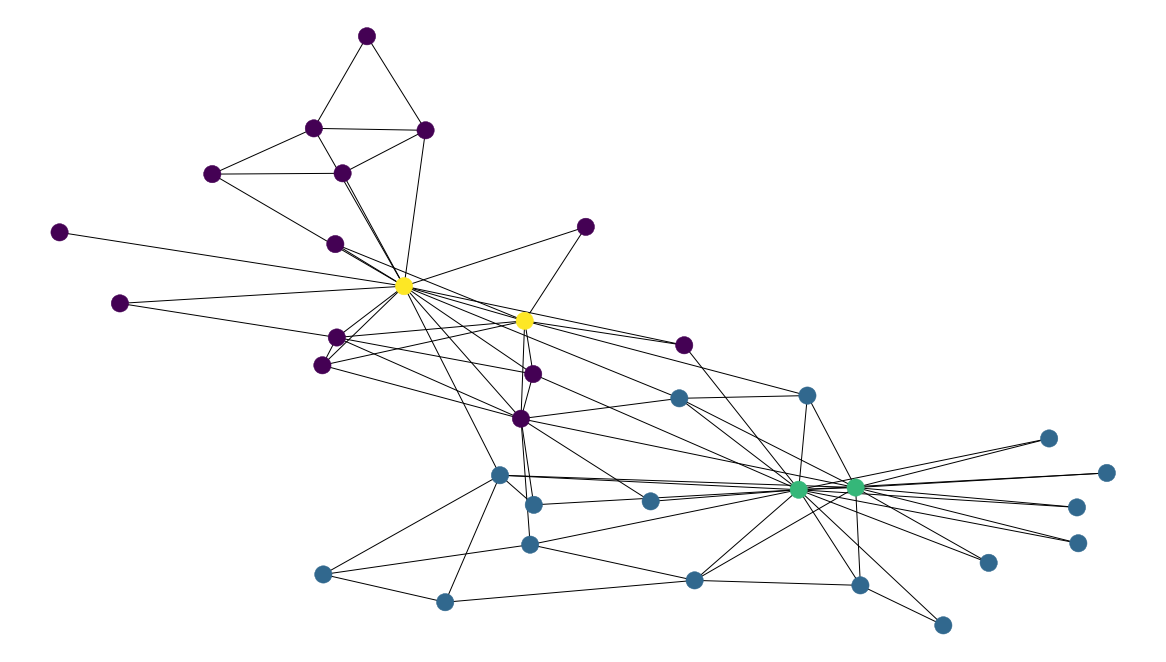

In [155]:
colours = createColoursFromSklearn(g, resultAgglomerative)
nx.draw(g, node_color=colours)